![Sentiment](https://images.unsplash.com/photo-1509909756405-be0199881695?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1470&q=80)

# Dataset

Hi, I'm marta, author of this dataset. With this notebook I intend to show some analysis that can be performed with the data I have collected. 

Specifically, I will perform a sentiment analysis, which I hope will encourage you to do some analysis of your own. I am still a beginner, so any suggestions or comments are very welcomed.

As I said in the file information, this dataset contains information about tweets made by Elon Musk in 2022, including, besides the tweets, its number of likes, retweets and creation date.

* **Tweets:** original text of the tweet.
* **Retweets:** number of retweets of the current tweet.
* **Likes:** number of likes of the current tweet.
* **Date:** date of creation of the tweet.
* **Cleaned_tweets:** text of the tweet after removing 'RT', hashtags, hyperlinks, mentions, emojis, leading and trailing whitespaces.

# Suppressing warnings and importing libraries

In [1]:
# Suppressing Warnings

import warnings
warnings.filterwarnings('ignore')


# Importing libraries

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

%matplotlib inline

# Reading and inspecting the data

In this case I will use the csv containing raw data to show the process I followed to clean the tweets. However, you can find the complete code (including the data extraction part using Tweepy) on my [Github](https://github.com/MartaCasdelg/Python-Projects/tree/main/Sentiment%20Analysis%20of%20Elon%20Musk%20Tweets).

In [2]:
df = pd.read_csv('../input/elon-musks-tweets-dataset-2022/rawdata.csv')

In [3]:
df.head()

,Tweets,Retweets,Likes,Date
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32


As you can see, the dataframe contains a column with elon musk's tweets, but they are not cleaned. In the next section I will show how to clean the text of symbols, emojis and other characters.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweets    3060 non-null   object
 1   Retweets  3060 non-null   int64 
 2   Likes     3060 non-null   int64 
 3   Date      3060 non-null   object
dtypes: int64(2), object(2)
memory usage: 95.8+ KB


# Data Cleaning

In [5]:
# Creating a function to clean the tweets

def cleantwt (twt):
  emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

  twt = re.sub('RT', '', twt) # remove 'RT' from tweets
  twt = re.sub('#[A-Za-z0-9]+', '', twt) # remove the '#' from the tweets
  twt = re.sub('\\n', '', twt) # remove the '\n' character
  twt = re.sub('https?:\/\/\S+', '', twt) # remove the hyperlinks
  twt = re.sub('@[\S]*', '', twt) # remove @mentions
  twt = re.sub('^[\s]+|[\s]+$', '', twt) # remove leading and trailing whitespaces
  twt = re.sub(emoj, '', twt) # remove emojis
  return twt

In [6]:
# Create a new column with the cleaned tweets

df['Cleaned_Tweets'] = df['Tweets'].apply(cleantwt)

In [7]:
df.head()

,Tweets,Retweets,Likes,Date,Cleaned_Tweets
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48,
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today!


Some of the tweets only contained mentions or emojis, so when I applied the cleanup to the dataframe, some rows were left with empty strings in the 'Cleaned_tweets' column. Now, I'm going to delete them.

In [8]:
# Drop rows with empty strings ('')

df.drop(df[df['Cleaned_Tweets'] == ''].index, inplace = True)

In [9]:
# Counting duplicate data in dataframe

df.duplicated().sum()

0

There are no duplicates in the dataframe, so I can start with the analysis.

# Sentiment Analysis

A very accurate definition of polarity and subjectivity in sentiment analysis is the following, provided by Christian Meyer on [Quora](https://www.quora.com/What-is-polarity-and-subjectivity-in-sentiment-analysis). 

* **Polarity** refers to the strength of an opinion. It could be positive or negative. If something has a strong positive feeling or emotion associated with it, such as admiration, trust, love; this will indeed have a certain orientation towards all other aspects of that object’s existence. The same goes for negative polarities. A good example would be the following: ‘I don’t think I’ll buy this item because my previous experience with a similar item wasn’t so good.’ That will have a negative polarity.

* **Subjectivity** refers to the degree to which a person is personally involved in an object. What matters the most here are personal connections and individual experiences with that object, which may or may not differ from someone else’s point of view. For example: ‘I’m very happy with my new smartphone because it has the highest performance available on the market.’ Similarly to polarity, strong subjectivity may be negative or positive. The statement here is clearly subjective because the user is actually talking about his experience and how he feels about an object.

Having clarified this, I will start the analysis by calculating the polarity and subjectivity of each tweet in the dataframe.

## Getting subjectivity and polarity

In [10]:
#Create a function to get the subjectivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

In [11]:
#Create two new columns to save the results of the created functions 
df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Cleaned_Tweets'].apply(getPolarity)

In [12]:
# Creating a function to classify or label the sentiments as negative, positive and neutral
def getSentiment(value):
  if value < 0:
    return 'Negative'
  elif value > 0:
    return 'Positive'
  else:
    return 'Neutral'

In [13]:
# Create a new column 'Sentiment'
df['Sentiment'] = df['Polarity'].apply(getSentiment)

In [14]:
#Show the data
df.head()

,Tweets,Retweets,Likes,Date,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks,0.20,0.2000,Positive
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely,0.90,0.2000,Positive
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers,0.00,0.0000,Neutral
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today!,0.65,0.4375,Positive
5,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,Entering Twitter HQ – let that sink in!,0.00,0.0000,Neutral


# Visualizations

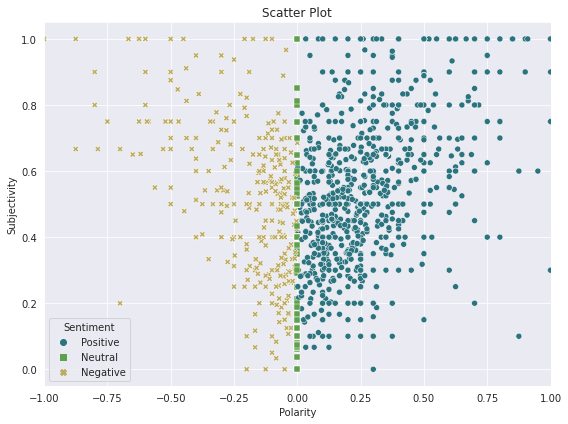

In [15]:
# Create scatter plot
sns.set_style('darkgrid')
plt.figure(figsize = (8,6))

markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}

sns.scatterplot(data=df, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.tight_layout()

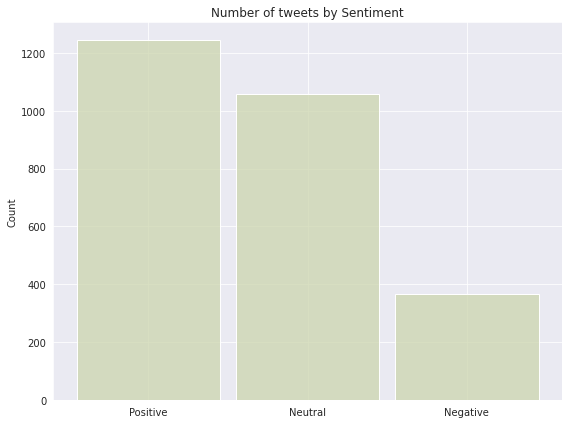

In [16]:
# Create a bar chart to count tweets according to its sentiment value

plt.figure(figsize = (8,6))

sns.histplot(df, x = 'Sentiment', color = '#ccd5ae', shrink = 0.9).set(xlabel = None)
plt.title('Number of tweets by Sentiment')

plt.tight_layout()

According to the data, most of Elon Musk's tweets are highly subjective and are perceived as positive or neutral.

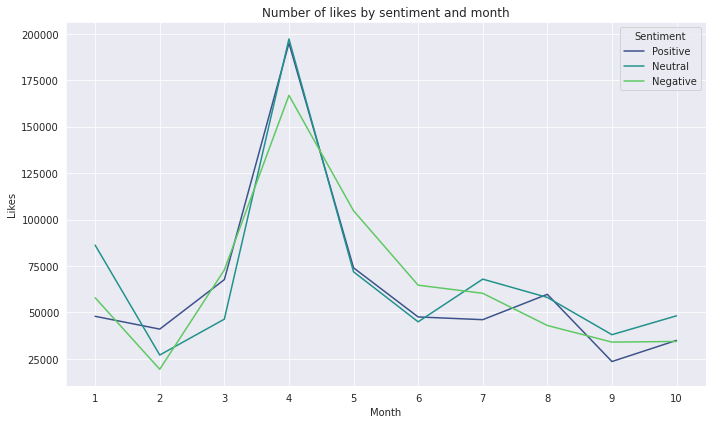

In [17]:
# Creating month column for time analysis
df['Month'] = pd.DatetimeIndex(df['Date']).month

# Creating a plot to show number of likes depending on sentiment through time

plt.figure(figsize = (10, 6))

months = df['Month'].unique()

sns.lineplot(x = 'Month', y = 'Likes', hue = 'Sentiment', ci = None, data = df, palette = 'viridis')
plt.title('Number of likes by sentiment and month')
plt.xlabel('Month')
plt.xticks(ticks = [m for m in months])

plt.tight_layout()

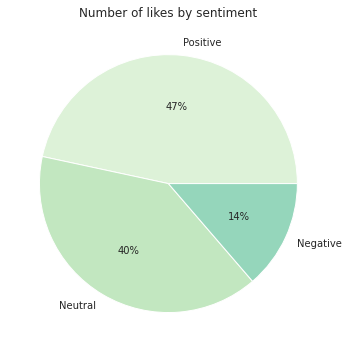

In [18]:
plt.figure(figsize = (10, 5))

data = df['Sentiment'].value_counts()
colors = sns.color_palette('GnBu')
labels = ['Positive', 'Neutral', 'Negative']

plt.pie(data, labels = labels, autopct = '%.0f%%', colors = colors)
plt.title('Number of likes by sentiment')

plt.tight_layout()

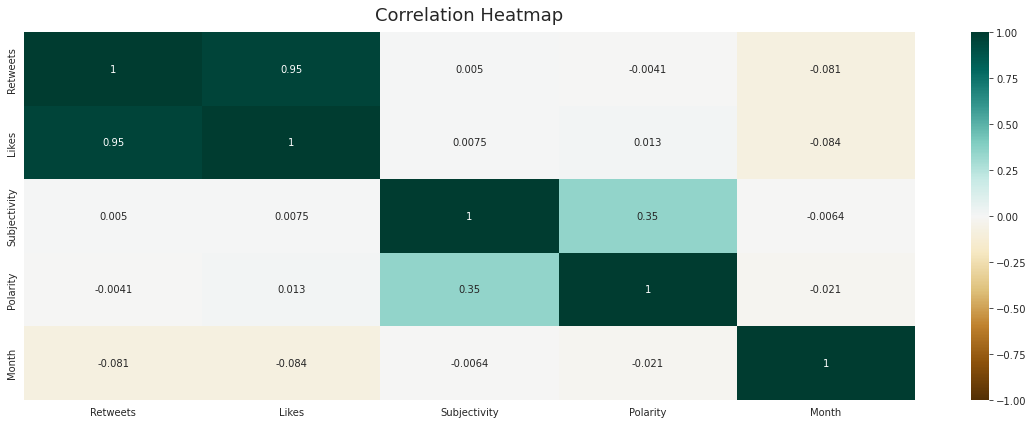

In [19]:
# Create correlation matrix to see correlation coefficients between sets of variables
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

plt.tight_layout()

Apparently likes and retweets have a strong positive linear relationship. On the other hand, subjectivity and polarity have a slight positive relationship.

# Conclusion

According to the data, most of elon musk's tweets contain a high load of subjectivity, which in turn could be related to polarity. That is, a slight relationship has been found between both variables, so that the greater the subjectivity, the greater the polarity (more positive sentiment). 

Another discovery was the close relationship between the likes and retweets variables. According to the correlation matrix, when the number of likes increases, so would the number of retweets, and vice versa. However, it is important to remember that this does not imply any causality between the variables.

On the other hand, the number of likes in the tweets seems to have no relationship with the sentiment variable, since in addition to the low degree of correlation, it was found that over the year the number of likes did not vary greatly depending on the type of sentiment found in the text. 

![github](https://www.marksei.com/wp-content/uploads/2018/06/GitHub-logo-720x210.png)

## You can find the full code of the analysis in my [github](https://github.com/MartaCasdelg/Python-Projects/tree/main/Sentiment%20Analysis%20of%20Elon%20Musk%20Tweets), where I also show how I extracted the data using tweepy and develop a text analysis.